<a href="https://colab.research.google.com/github/AhzamAhmed6/CIFAR-using-CNN/blob/main/28PyTorch_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

batch_size=128
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    shuffle=True,
    batch_size=batch_size
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [3]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [4]:
len(train_dataset.targets)

50000

In [5]:
model = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6, 16, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),

    nn.Linear(16*5*5, 120),
    nn.Linear(120, 84),
    nn.Linear(84, 10)
)

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
model.to(device)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Linear(in_features=120, out_features=84, bias=True)
  (9): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
epochs = 10
def traning(train_loader, epochs, criterion, optimizer, model):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    train_losses[i] = np.mean(train_loss)
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    test_losses[i] = np.mean(test_loss)
  return train_losses, test_losses

In [15]:
train_losses, test_losses = traning(train_loader, epochs, criterion, optimizer, model)

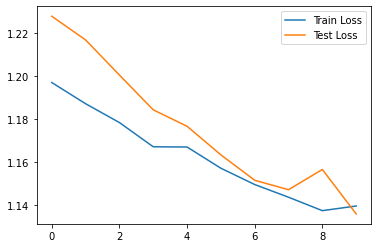

In [16]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();